# Looking at genre popularity

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [190]:
### MOVIE DATABASES ###

# Box Office Mojo by IMDb Pro
movie_gross_df = pd.read_csv('../data/zippedData/bom.movie_gross.csv.gz')

# IMDb
imdb_name_df = pd.read_csv('../data/zippedData/imdb.name.basics.csv.gz')
imdb_akas_df = pd.read_csv('../data/zippedData/imdb.title.akas.csv.gz')
imdb_basics_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz')
imdb_crew_df = pd.read_csv('../data/zippedData/imdb.title.crew.csv.gz')
imdb_principals_df = pd.read_csv('../data/zippedData/imdb.title.principals.csv.gz')
imdb_ratings_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz')

# Rotten Tomatos
rt_movies_df = pd.read_csv('../data/zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('../data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

# The Movie Database
tmdb_movies_df = pd.read_csv('../data/zippedData/tmdb.movies.csv.gz')

# The Numbers
tn_budgets_df = pd.read_csv('../data/zippedData/tn.movie_budgets.csv.gz')

### Joining imdb_title_basics_df and imdb_ratings_df

The goal here is to see which movie genres performed well based on their average rating.

In [191]:
imdb_basics_rating_df = pd.merge(left=imdb_basics_df,right=imdb_ratings_df,
                               on='tconst',how='inner')

In [192]:
movie_gross_df_copy = movie_gross_df.copy()
movie_gross_df_copy.rename(columns={'title': 'primary_title'}, inplace=True)
movie_gross_df_copy

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Joining movie_gross_df

In [193]:
imdb_basics_rating_gross = pd.merge(left=imdb_basics_rating_df,right=movie_gross_df_copy,
                               on='primary_title',how='inner')

In [194]:
imdb_basics_rating_gross

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


In [195]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


### Cleaning the resulting dataframe

foreign_gross is a string type column, need to conver to float data type.

In [196]:
imdb_basics_rating_gross['foreign_gross'] = imdb_basics_rating_gross['foreign_gross'].str.replace(',','')

In [197]:
imdb_basics_rating_gross['foreign_gross'] = imdb_basics_rating_gross['foreign_gross'].astype(float)

In [198]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   float64
 11  year             3027 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 307.4+ KB


### Dealing with columns with missing values

The domestic_gross column has a few missing values. Dropping those few will not make a significant impact on the analysis.

In [199]:
imdb_basics_rating_gross = imdb_basics_rating_gross[imdb_basics_rating_gross['domestic_gross'].isna() != True]

In [200]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3005 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3005 non-null   object 
 1   primary_title    3005 non-null   object 
 2   original_title   3005 non-null   object 
 3   start_year       3005 non-null   int64  
 4   runtime_minutes  2958 non-null   float64
 5   genres           2998 non-null   object 
 6   averagerating    3005 non-null   float64
 7   numvotes         3005 non-null   int64  
 8   studio           3004 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1810 non-null   float64
 11  year             3005 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 305.2+ KB


The genres column also has missing values. We will drop these rows since it is only a few and we cannot replace them without knowing the exact genres the movies are categorized by.

In [201]:
imdb_basics_rating_gross = imdb_basics_rating_gross[imdb_basics_rating_gross['genres'].isna() != True]

In [202]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2998 non-null   object 
 1   primary_title    2998 non-null   object 
 2   original_title   2998 non-null   object 
 3   start_year       2998 non-null   int64  
 4   runtime_minutes  2953 non-null   float64
 5   genres           2998 non-null   object 
 6   averagerating    2998 non-null   float64
 7   numvotes         2998 non-null   int64  
 8   studio           2997 non-null   object 
 9   domestic_gross   2998 non-null   float64
 10  foreign_gross    1803 non-null   float64
 11  year             2998 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 304.5+ KB


### Finding the top 10 movie genres with at least an 8 average rating

We want to know which movie genres are popular. The way we will distinguish which genres are popular, will be to look at the movies that were rated at least an 8.

In [203]:
ratings_over_8 = imdb_basics_rating_gross[imdb_basics_rating_gross['averagerating'] >= 8]

In [204]:
genres = list(ratings_over_8['genres'].unique())
x = []

for genre in genres:
    x.append(str(genre).split(','))

    
genres_freq = {}

for lists in x:
    for genre in lists:
        if genre in genres_freq:
            genres_freq[genre] += 1
        else:
            genres_freq[genre] = 1

In [205]:
sorted_genres_frequency = {k: v for k, v in sorted(genres_freq.items(), key=lambda item: item[1],reverse=True)}
sorted_genres_frequency

{'Drama': 35,
 'Documentary': 20,
 'Biography': 16,
 'Comedy': 13,
 'Action': 12,
 'Thriller': 11,
 'Crime': 11,
 'Adventure': 10,
 'History': 7,
 'Animation': 5,
 'Music': 5,
 'Sport': 5,
 'Romance': 4,
 'Mystery': 4,
 'Sci-Fi': 3,
 'War': 3,
 'Family': 3,
 'Fantasy': 2,
 'Western': 1,
 'News': 1}

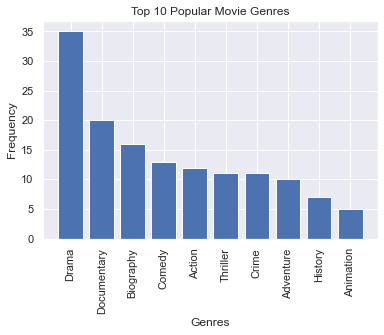

In [206]:
x = list(sorted_genres_frequency.keys())[:10]
y = list(sorted_genres_frequency.values())[:10]

fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_title('Top 10 Popular Movie Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Frequency')
plt.xticks(rotation = 90);

### Returns on genres

In [207]:
ratings_over_8.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,131.000000,124.000000,131.000000,1.310000e+02,1.310000e+02,7.900000e+01,131.000000
mean,2014.007634,114.508065,8.261832,2.100038e+05,6.040091e+07,1.645359e+08,2014.106870
std,2.543457,31.527636,0.279411,3.403201e+05,1.099232e+08,1.937938e+08,2.581746
min,2010.000000,45.000000,8.000000,5.000000e+00,1.200000e+03,1.369500e+03,2010.000000
25%,2012.000000,94.500000,8.000000,3.200000e+01,5.755000e+05,1.115000e+07,2012.000000
50%,2014.000000,110.000000,8.200000,3.347800e+04,4.200000e+06,8.860000e+07,2014.000000
75%,2016.000000,138.250000,8.400000,3.552880e+05,8.075000e+07,2.688500e+08,2016.000000
max,2019.000000,192.000000,9.200000,1.841066e+06,6.788000e+08,6.872000e+08,2018.000000


In [219]:
tmdb_movies_df = tmdb_movies_df.drop('Unnamed: 0', axis = 1)

In [221]:
tmdb_movies_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [220]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,315.369636


### ROI (Return on Investment)

In [210]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [211]:
def to_float(series):
    series = series.str.replace('$','')
    series = series.str.replace(',','')
    series = series.astype(float)
    return series
tn_budgets_df['production_budget'] = to_float(tn_budgets_df['production_budget'])
tn_budgets_df['domestic_gross'] = to_float(tn_budgets_df['domestic_gross'])
tn_budgets_df['worldwide_gross'] = to_float(tn_budgets_df['worldwide_gross'])

In [212]:
tn_budgets_df['return'] = tn_budgets_df['worldwide_gross'] - tn_budgets_df['production_budget']

In [213]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [218]:
tn_budgets_df['ROI'] = (tn_budgets_df['worldwide_gross']-tn_budgets_df['production_budget'])/tn_budgets_df['production_budget']
tn_budgets_df['ROI']= tn_budgets_df['ROI']*100
tn_budgets_df['ROI'].max()

179900.0

In [164]:
imdb_principals_df

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [165]:
imdb_akas_df

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
